In [2]:
import numpy as np
import cv2
import json
import numpy as np
import quaternion
import math
import os
import cv2
import open3d as o3d
import natsort 
import shutil

import matplotlib.pyplot as plt
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [42]:
# TODO : write a lidar file path, an img flie and calib file path
lidar_path = '/home/server-003/workspace/data/superb_mobis/jupyter_apps/asset/0a10c009-dc8b-4479-80f4-49db9e60b473/pointclouds_00000001.bin'
img_path ='/home/server-003/workspace/data/superb_mobis/jupyter_apps/asset/0a10c009-dc8b-4479-80f4-49db9e60b473/image_00000001_00000001.jpg'
v2c_filepath =  '/home/server-003/workspace/data/superb_mobis/jupyter_apps/asset/0a10c009-dc8b-4479-80f4-49db9e60b473/manifest.json'
# c2c_filepath = './calib_cam_to_cam.txt'
# TODO : mode means cam number , i.e) cam_00 's mode is 00
mode = '00'
v_fov = (-50.9, 50.0)
h_fov = (-90, 90)
RT_matrix=None
RT_matrix_inverse=None
fx = 1960.48659
cx =1009.73752 
fy = 1956.92364
cy =  648.313903
 
intrinsic = np.array([fx,0,cx,0,fy,cy,0,0,1]).reshape(3,3)
right_distortion =np.array([[ 0.00926532],
       [-0.01398719],
       [ 1.02683242],
       [-2.81900978]])
# intrinsic = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(
#     right_intrinsic,     
#     right_distortion, 
#     (width,height),
#     None,
#     balance=1.0
# )
image = cv2.imread(img_path)
height, width = image.shape[:2]
P = np.array([fx,0,cx,0,fy,cy,0,0,1]).reshape(3,3)
 

In [43]:
# jsonString
rot_matrix=None
tran_matrix=None

In [44]:
# jsonString

In [45]:
try:
    file = open(v2c_filepath)
except:
    print("Error: Failed to open the file")

jsonString = json.load(file)
jsonArray = jsonString.get("manifest").get('frames')
idx=0
for list in jsonArray:
    imageArray = list.get("images")
    for camArray in imageArray:
        positionArray = camArray.get('position')
        pose_x = positionArray.get('x')
        pose_y = positionArray.get('y')
        pose_z = positionArray.get('z')

        quaternionArray = camArray.get('heading')
        qw = quaternionArray.get('qw')
        qx = quaternionArray.get('qx')
        qy = quaternionArray.get('qy')
        qz = quaternionArray.get('qz')
        q = np.quaternion(qw,qx,qy,qz)
        #cam to lidar
        rot_matrix = quaternion.as_rotation_matrix(q)
        rot_matrix = np.linalg.inv(rot_matrix)
        
#         zero = np.array([0,0,0]).reshape(3,1)
#         homo = np.array([0,0,0,1]).reshape(1,4)
#         rot_matrix = np.concatenate([rot_matrix,zero],axis=1)
#         rot_matrix = np.concatenate([rot_matrix,homo],axis=0)
#         rot_matrix = np.latrix)inalg.inv(rot_m
        translation_matrix = np.array([pose_x,pose_y,pose_z]).reshape(3,1)
#         translation_matrix = -np.matmul(rot_matrix, translation_matrix).reshape(3,1)
        kitti_style_extrinsic = np.concatenate([rot_matrix, -np.matmul(rot_matrix, translation_matrix).reshape(3, 1)], axis=1)

#         ht_dummy = np.array([[0,0,0,1]])
#         RT_matrix = np.matmul(rot_matrix,translation_matrix)
        print(rot_matrix)
        print(kitti_style_extrinsic)
#         print(RT_matrix)
#         RT_matrix = np.linalg.inv(RT_matrix)
#         RT_matrix_inverse=np.round_(RT_matrix_inverse,5)

#         print(RT_matrix_inverse)
        cx = camArray.get('cx')
        cy = camArray.get('cy')
        skew = camArray.get('skew')
        fx = camArray.get('fx')
        fy = camArray.get('fy')
        projectionArray = camArray.get('new_camera_matrix')
        pro_cx=projectionArray.get('cx')
        pro_fx=projectionArray.get('fx')
        pro_skew=projectionArray.get('skew')
        pro_cy=projectionArray.get('cy')
        pro_fy=projectionArray.get('fy')
        print(f'{fx} {cx} {fy} {cy}')

[[ 0.89737824  0.44118505 -0.00824847]
 [-0.01564546  0.01313088 -0.99979138]
 [-0.4409847   0.89732008  0.01868591]]
[[ 0.89737824  0.44118505 -0.00824847  1.43828858]
 [-0.01564546  0.01313088 -0.99979138 -0.9527363 ]
 [-0.4409847   0.89732008  0.01868591  0.76668165]]
1928.550526376063 1054.9535111622367 1924.608871922166 631.8485515526618
[[ 0.89737824  0.44118505 -0.00824847]
 [-0.01564546  0.01313088 -0.99979138]
 [-0.4409847   0.89732008  0.01868591]]
[[ 0.89737824  0.44118505 -0.00824847  1.43828858]
 [-0.01564546  0.01313088 -0.99979138 -0.9527363 ]
 [-0.4409847   0.89732008  0.01868591  0.76668165]]
1928.550526376063 1054.9535111622367 1924.608871922166 631.8485515526618
[[ 0.89737824  0.44118505 -0.00824847]
 [-0.01564546  0.01313088 -0.99979138]
 [-0.4409847   0.89732008  0.01868591]]
[[ 0.89737824  0.44118505 -0.00824847  1.43828858]
 [-0.01564546  0.01313088 -0.99979138 -0.9527363 ]
 [-0.4409847   0.89732008  0.01868591  0.76668165]]
1928.550526376063 1054.9535111622367 1

In [46]:
rot_matrix

array([[ 0.89737824,  0.44118505, -0.00824847],
       [-0.01564546,  0.01313088, -0.99979138],
       [-0.4409847 ,  0.89732008,  0.01868591]])

In [47]:
kitti_style_extrinsic

array([[ 0.89737824,  0.44118505, -0.00824847,  1.43828858],
       [-0.01564546,  0.01313088, -0.99979138, -0.9527363 ],
       [-0.4409847 ,  0.89732008,  0.01868591,  0.76668165]])

In [48]:
# kitti_style_extrinsic = np.concatenate([rot_matrix, -np.matmul(rot_matrix, translation_matrix).reshape(3, 1)], axis=1)
# kitti_style_extrinsic
# kitti_style_extrinsic = np.concatenate([rot_matrix, translation_matrix.reshape(3, 1)], axis=1)
kitti_style_extrinsic

array([[ 0.89737824,  0.44118505, -0.00824847,  1.43828858],
       [-0.01564546,  0.01313088, -0.99979138, -0.9527363 ],
       [-0.4409847 ,  0.89732008,  0.01868591,  0.76668165]])

In [49]:
# RT_matrix = np.delete(RT_matrix, 3, axis=0)
# # RT_matrix_inverse = np.delete(RT_matrix_inverse, 3, axis=0)
# RT_matrix

In [50]:
# h_fov[1:]
def load_bin(bin_path):
    points = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]


points = load_bin(lidar_path)

In [51]:
# load lidar file(.bin)
def load_bin(bin_path):
    points = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]


points = load_bin(lidar_path)
points.shape
points_shape = points.shape
ones = np.ones((points_shape[0], 1))
points_homo = np.concatenate([points, ones], axis=1)


points_cam = np.dot(kitti_style_extrinsic, points_homo.T).T
points_prj = np.dot(intrinsic, points_cam.T).T
points_prj /= points_prj[:, 2:3]

In [52]:
eff_inds = (
    (points_prj[:, 0] < width)
    & (points_prj[:, 0] >= 0)
    & (points_prj[:, 1] < height)
    & (points_prj[:, 1] >= 0)
)
eff_inds_where = np.where(eff_inds)[0]

eff_pcd_img = points_prj[eff_inds, :]
print(len(eff_pcd_img))

41266


In [53]:
cmap = plt.cm.get_cmap("hsv", 256)
cmap = np.array([cmap(i) for i in range(256)])[:, :3] * 255
img_lidar = np.copy(image)

for i in range(eff_pcd_img.shape[0]):
    pcd_cam_idx = eff_inds_where[i]
    pcd_cam_value = points_cam[pcd_cam_idx, :]
    depth = pcd_cam_value[2]
    if depth < -0 or depth > 150:
        continue
    color = cmap[int(abs(640.0 / depth)) % 256, :]
    cv2.circle(
        img_lidar,
        (int(np.round(eff_pcd_img[i, 0])), int(np.round(eff_pcd_img[i, 1]))),
        2,
        color=tuple(color),
        thickness=-1,
    )

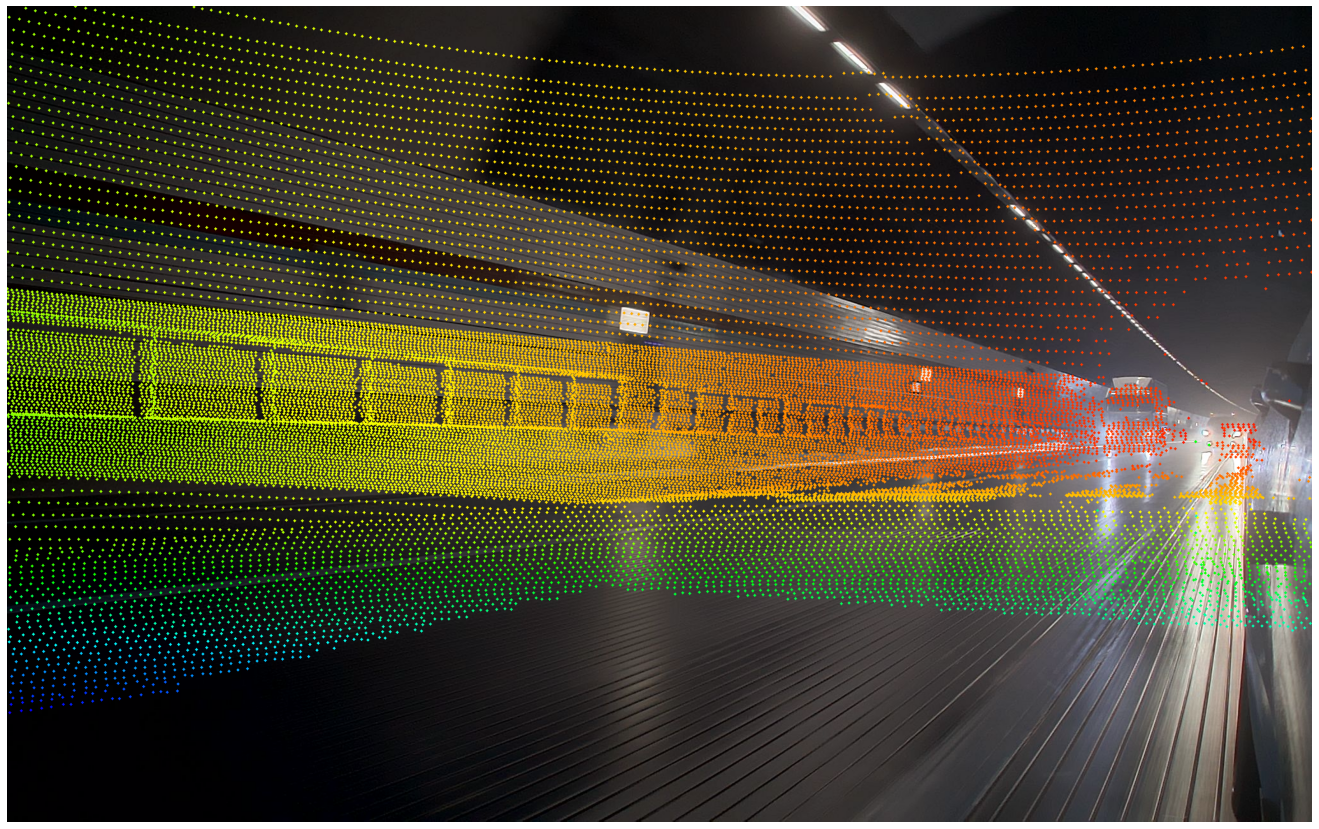

In [54]:
fig_lidar = plt.figure(figsize=(25, 15))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.axis('off')
plt.show()

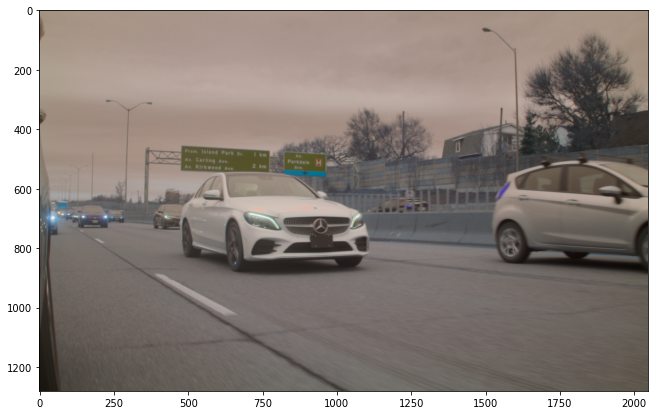

In [26]:
# load img file

plt.subplots(1, 1, figsize=(15, 7))
plt.imshow(image)

In [6]:
def depth_color(val, min_d=0, max_d=120):
    """ 
    print Color(HSV's H value) corresponding to distance(m) 
    close distance = red , far distance = blue
    """
    np.clip(val, 0, max_d, out=val)  # max distance is 120m but usually not usual
    return (((val - min_d) / (max_d - min_d)) * 120).astype(np.uint8)


def in_h_range_points(points, m, n, fov):
    """ extract horizontal in-range points """
    return np.logical_and(np.arctan2(n, m) > (-fov[1] * np.pi / 180),
                          np.arctan2(n, m) < (-fov[0] * np.pi / 180))


def in_v_range_points(points, m, n, fov):
    """ extract vertical in-range points """
    return np.logical_and(np.arctan2(n, m) < (fov[1] * np.pi / 180),
                          np.arctan2(n, m) > (fov[0] * np.pi / 180))


def fov_setting(points, x, y, z, dist, h_fov, v_fov):
    """ filter points based on h,v FOV  """

    if h_fov[1] == 180 and h_fov[0] == -180 and v_fov[1] == 2.0 and v_fov[0] == -24.9:
        return points

    if h_fov[1] == 180 and h_fov[0] == -180:
        return points[in_v_range_points(points, dist, z, v_fov)]
    elif v_fov[1] == 2.0 and v_fov[0] == -24.9:
        return points[in_h_range_points(points, x, y, h_fov)]
    else:
        h_points = in_h_range_points(points, x, y, h_fov)
        v_points = in_v_range_points(points, dist, z, v_fov)
        return points[np.logical_and(h_points, v_points)]


def velo_points_filter(points, v_fov, h_fov):
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    dist = np.sqrt(x**2+y**2+z**2)

    if h_fov[0] < -90:
        h_fov = (-90,) + h_fov[1:]
    if h_fov[1] > 90:
        h_fov = h_fov[:1] + (90,)

    x_lim = fov_setting(x, x, y, z, dist, h_fov, v_fov)[:, None]
    y_lim = fov_setting(y, x, y, z, dist, h_fov, v_fov)[:, None]
    z_lim = fov_setting(z, x, y, z, dist, h_fov, v_fov)[:, None]

    # Stack arrays in sequence horizontally
    xyz_ = np.hstack((x_lim, y_lim, z_lim))
    xyz_ = xyz_.T

    # stack (1,n) arrays filled with the number 1
    one_mat = np.full((1, xyz_.shape[1]), 1)
    xyz_ = np.concatenate((xyz_, one_mat), axis=0)

    # need dist info for points color
    dist_lim = fov_setting(dist, x, y, z, dist, h_fov, v_fov)
    color = depth_color(dist_lim, 0, 70)

    return xyz_, color

In [7]:
def calib_velo2cam(filepath):
    """ 
    get Rotation(R : 3x3), Translation(T : 3x1) matrix info 
    using R,T matrix, we can convert velodyne coordinates to camera coordinates
    """
    with open(filepath, "r") as f:
        file = f.readlines()

        for line in file:
            (key, val) = line.split(':', 1)
            if key == 'Tr_velo_to_cam':
                RT = np.fromstring(val, sep=' ')
                RT = RT.reshape(3, 4)
#             if key == 'T':
#                 T = np.fromstring(val, sep=' ')
#                 T = T.reshape(3, 1)
    return RT


def calib_cam2cam(filepath, mode):
    """
    If your image is 'rectified image' :
        get only Projection(P : 3x4) matrix is enough
    but if your image is 'distorted image'(not rectified image) :
        you need undistortion step using distortion coefficients(5 : D)

    in this code, I'll get P matrix since I'm using rectified image
    """
    with open(filepath, "r") as f:
        file = f.readlines()

        for line in file:
            (key, val) = line.split(':', 1)
            if key == 'P2':
                P_ = np.fromstring(val, sep=' ')
                P_ = P_.reshape(3, 4)
                # erase 4th column ([0,0,0])
                P_ = P_[:3, :3]
    return P_

In [8]:
# R_vc = Rotation matrix (lidar -> cam)# R_vc = Rotation matrix (lidar -> cam)
# T_vc = Translation matrix (lidar -> cam)
# P_ = projection_matrix(cam 3d points -> img 2d points)

def velo3d_2_camera2d_points(points, vc_path, cc_path, mode, v_fov, h_fov):
#     RT = calib_velo2cam(vc_path)
#     print(RT)
#     P = calib_cam2cam(cc_path, mode)
#     print(P)
    xyz_v, c_ = velo_points_filter(points, v_fov, h_fov)
    """    
            [r_11 , r_12 , r_13 , t_x ]
    RT   =  [r_21 , r_22 , r_23 , t_y ]   
            [r_31 , r_32 , r_33 , t_z ]
    """
#     RT = np.concatenate((R_vc, T_vc), axis=1)
    # convert velodyne coordinates(X_v, Y_v, Z_v) to camera coordinates(X_c, Y_c, Z_c)
    
#     for i in range(xyz_v.shape[1]):
#         xyz_v[:3, i] = np.matmul(RT_matrix, xyz_v[:, i])
    xyz_v = np.matmul(RT_matrix,xyz_v)
#     print(xy_i)

    xyz_c = np.delete(xyz_v, 3, axis=0)

    # convert camera coordinates(X_c, Y_c, Z_c) image(pixel) coordinates(x,y)
#     for i in range(xyz_c.shape[1]):
    xyz_c = np.matmul(P, xyz_c)

    """
    xy_i - 3D velodyne points corresponding to h, v FOV in the image(pixel) coordinates before scale adjustment
    ans  - 3D velodyne points corresponding to h, v FOV in the image(pixel) coordinates
             [s_1*x_1 , s_2*x_2 , .. ]
    xy_i =   [s_1*y_1 , s_2*y_2 , .. ]        ans =   [x_1 , x_2 , .. ]  
             [  s_1   ,   s_2   , .. ]                [y_1 , y_2 , .. ]
    """
    xy_i = xyz_c[::]/xyz_c[::][2]
#     print(xy_i)
    ans = np.delete(xy_i, 2, axis=0)
    
    """
    width = 1242
    height = 375
    w_range = in_range_points(ans[0], width)
    h_range = in_range_points(ans[1], height)

    ans_x = ans[0][np.logical_and(w_range,h_range)][:,None].T
    ans_y = ans[1][np.logical_and(w_range,h_range)][:,None].T
    c_ = c_[np.logical_and(w_range,h_range)]

    ans = np.vstack((ans_x, ans_y))
    """

    return ans, c_

In [12]:
def print_projection_plt(points, color, image):
    """ project converted velodyne points into camera image """

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for i in range(points.shape[1]):
        cv2.circle(hsv_image, (np.int32(points[0][i]), np.int32(
            points[1][i])), 2, (int(color[i]), 255, 255), -1)

    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)


image = cv2.imread(img_path)
ans, c_ = velo3d_2_camera2d_points(velo_points, v2c_filepath,
                                   v2c_filepath, mode, v_fov, h_fov)
image = print_projection_plt(points=ans, color=c_, image=image)
plt.subplots(1, 1, figsize=(25, 15))
plt.title("Velodyne points to camera image Result")

plt.imshow(image)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)